<a href="https://colab.research.google.com/github/s-ahmed6786/GANs-Concept-Car-Generator/blob/main/Batch_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
DATA_DIR = ('/content/gdrive/Shareddrives/Classes/MachineLearning/GAN/PreprocessedData/data/Images')
# List all files in the directory
image_files = os.listdir(DATA_DIR)
print(len(image_files))


3617


In [ ]:
image = os.path.join(DATA_DIR, image_files[1])
original_image = mpimg.imread(image)

Text(0.5, 1.0, 'Zoomed out Image')

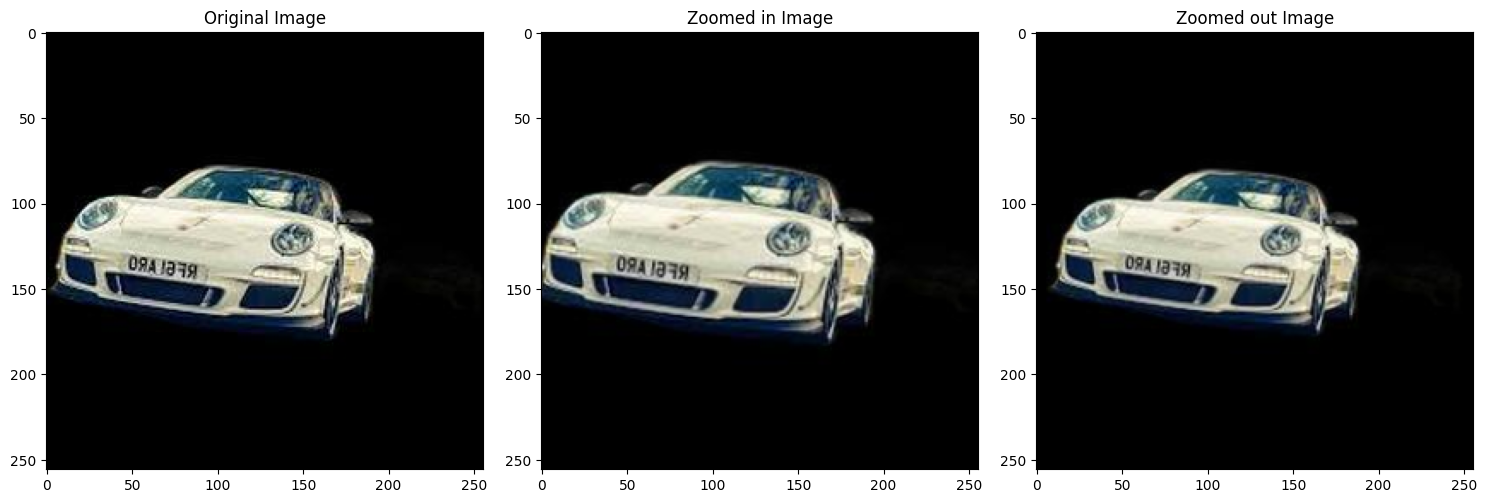

In [ ]:
import imgaug.augmenters as iaa
def zoom(image, scale):
  zoom =  iaa.Affine(scale=scale)  # Zooming in by 5%
  image = zoom.augment_image(image)
  return image

zoomed_in_image = zoom(original_image, 1.05)
zoomed_out_image = zoom(original_image,0.95)

fig, axs = plt.subplots(1, 3, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(zoomed_in_image)
axs[1].set_title('Zoomed in Image')
axs[2].imshow(zoomed_out_image)
axs[2].set_title('Zoomed out Image')

Text(0.5, 1.0, 'Dim Image')

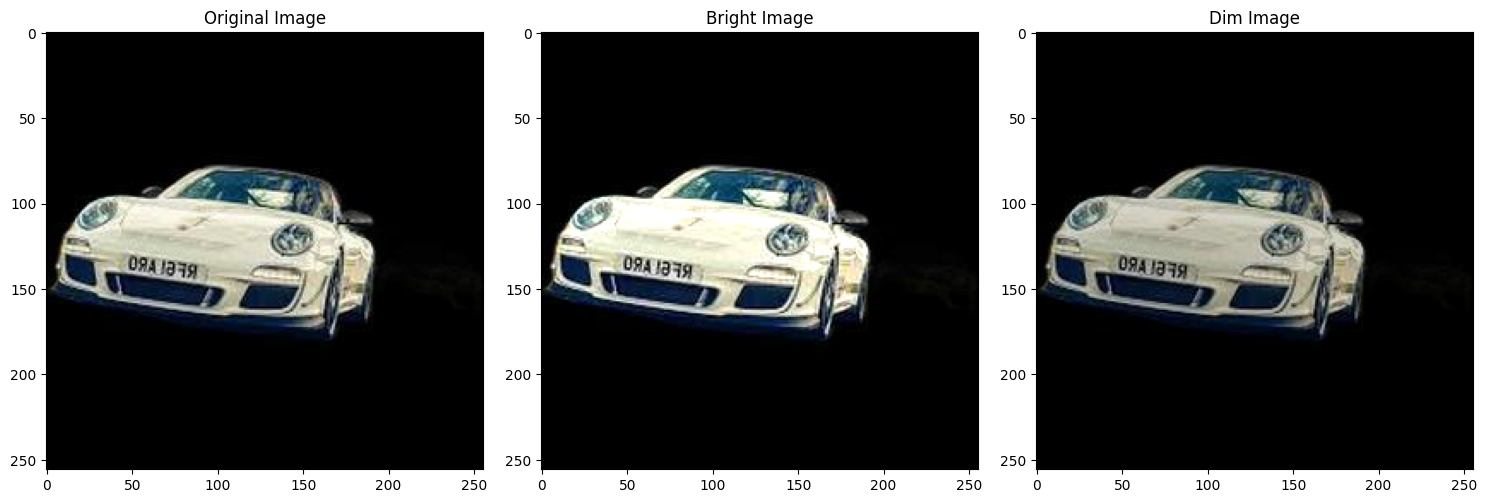

In [ ]:
def img_brighten(image, multiplier):
    brightness = iaa.Multiply(multiplier)
    image = brightness.augment_image(image)
    return image

bright_image = img_brighten(original_image, 1.15)
dimmed_image = img_brighten(original_image, 0.85)

fig, axs = plt.subplots(1, 3, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(bright_image)
axs[1].set_title('Bright Image')
axs[2].imshow(dimmed_image)
axs[2].set_title('Dim Image')

Text(0.5, 1.0, 'CounterClockwise Image')

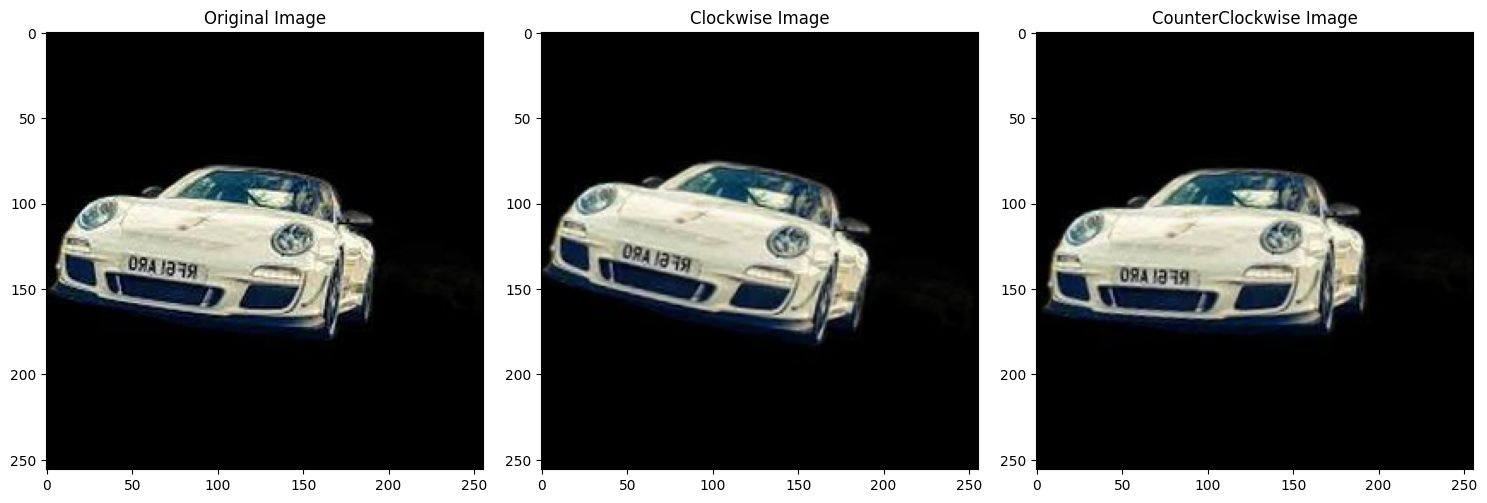

In [ ]:
import cv2

def rotate_image(original_image, degrees):
    # Get image center
    height, width = original_image.shape[:2]
    center = (width / 2, height / 2)

    # Perform the rotation
    rotation_matrix = cv2.getRotationMatrix2D(center, degrees, 1.0)
    rotated_image = cv2.warpAffine(original_image, rotation_matrix, (width, height))

    return rotated_image


counter_clockwise_rotate = rotate_image(original_image, 5)
clockwise_rotate = rotate_image(original_image, -5)

fig, axs = plt.subplots(1, 3, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(clockwise_rotate)
axs[1].set_title('Clockwise Image')
axs[2].imshow(counter_clockwise_rotate)
axs[2].set_title('CounterClockwise Image')

Text(0.5, 1.0, 'BW Image')

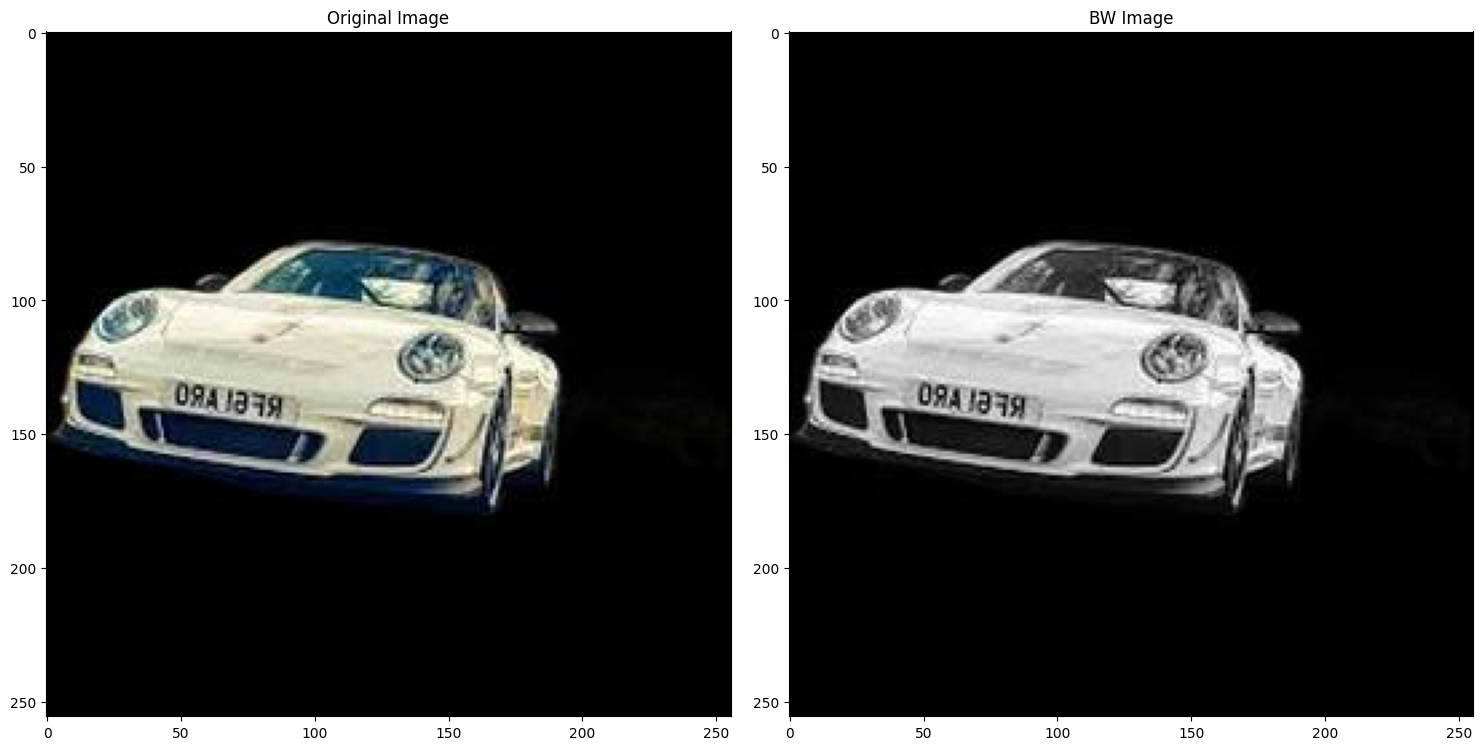

In [ ]:
import cv2
def bw(image):
    img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return img

bw_image = bw(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))

fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(bw_image, cmap='gray')  # Use 'gray' colormap for grayscale images
axs[1].set_title('BW Image')


In [ ]:
# Assuming you have functions like zoom, rotate_image, img_brighten defined

import matplotlib.pyplot as plt

# Assuming you have the original_image defined
def batch_generator(original_image, index, output_folder_path):
  transformations = [
      (lambda img: img),  # Do nothing
      (lambda img: zoom(img, 1.05)),  # Zoom in
      (lambda img: zoom(img, 0.85)),  # Zoom out
  ]
  count = 0
  for i in range(3):
      transformed_image = transformations[i](original_image)

      rotation_actions = [
          (lambda img: img),  # Do nothing
          (lambda img: rotate_image(img, -5)),  # Rotate clockwise
          (lambda img: rotate_image(img, 5)),  # Rotate counterclockwise
      ]

      for j in range(3):
          temp_image = rotation_actions[j](transformed_image)

          brightness_actions = [
              (lambda img: img),  # Do nothing
              (lambda img: img_brighten(img, 1.15)),  # Brighten
              (lambda img: img_brighten(img, 0.85)),  # Dimmen
          ]

          for k in range(3):
              final_image = brightness_actions[k](temp_image)
              #plt.imshow(final_image)
              #plt.show()  # Show each transformed image

              # Determine File name
              file_name = f"{index}_{count}.jpg"

              # Convert image array to PIL image
              pil_image = Image.fromarray(final_image)
              # Create the folder name for the normal batch
              normal_foldername = "NormalBatchedDataset"
              normal_file_path = f"{output_folder_path}/{normal_foldername}/{file_name}"
              # Create the output folder if it doesn't exist
              if not os.path.exists(f"{output_folder_path}/{normal_foldername}"):
                os.makedirs(f"{output_folder_path}/{normal_foldername}")
              # Save the image
              pil_image.save(normal_file_path)

              # Convert image array to PIL image
              bw_pil_image = Image.fromarray(bw(final_image))
              # Create the folder name for the normal batch
              bw_foldername = "BWBatchedDataset"
              bw_file_path = f"{output_folder_path}/{bw_foldername}/{file_name}"
              # Create the output folder if it doesn't exist
              if not os.path.exists(f"{output_folder_path}/{bw_foldername}"):
                os.makedirs(f"{output_folder_path}/{bw_foldername}")
              # Save the image
              bw_pil_image.save(bw_file_path)

              count +=1


# output_folder_path = '/content/gdrive/Shareddrives/Classes/MachineLearning/GAN/PreprocessedData'
# batch_generator(original_image, 0, output_folder_path)

In [ ]:
import os
import matplotlib.image as mpimg
import time

DATA_DIR = '/content/gdrive/Shareddrives/Classes/MachineLearning/GAN/PreprocessedData/data/Images'
output_folder_path = '/content/gdrive/Shareddrives/Classes/MachineLearning/GAN/PreprocessedData'

# List all files in the directory
image_files = os.listdir(DATA_DIR)



for i in range(800,850):
  image = os.path.join(DATA_DIR, image_files[i])
  image = mpimg.imread(image)
  batch_generator(image,i,output_folder_path)
  print(f"Images saved to Google Drive: {i}")
  time.sleep(15)


Images saved to Google Drive: 800
Images saved to Google Drive: 801
Images saved to Google Drive: 802
Images saved to Google Drive: 803
Images saved to Google Drive: 804
Images saved to Google Drive: 805
Images saved to Google Drive: 806
Images saved to Google Drive: 807
Images saved to Google Drive: 808
Images saved to Google Drive: 809
Images saved to Google Drive: 810
Images saved to Google Drive: 811
Images saved to Google Drive: 812
Images saved to Google Drive: 813
Images saved to Google Drive: 814
Images saved to Google Drive: 815
Images saved to Google Drive: 816
Images saved to Google Drive: 817
Images saved to Google Drive: 818
Images saved to Google Drive: 819
Images saved to Google Drive: 820
Images saved to Google Drive: 821
Images saved to Google Drive: 822
Images saved to Google Drive: 823
Images saved to Google Drive: 824
Images saved to Google Drive: 825
Images saved to Google Drive: 826
Images saved to Google Drive: 827
Images saved to Google Drive: 828
Images saved t

In [ ]:
import os
folder= '/content/gdrive/Shareddrives/Classes/MachineLearning/GAN/PreprocessedData/NormalBatchedDataset'
print(len(os.listdir(folder)))

22950
